In [1]:
import pandas as pd

data = pd.read_csv('Country-data.csv')
            
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
data.shape

(167, 10)

In [3]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


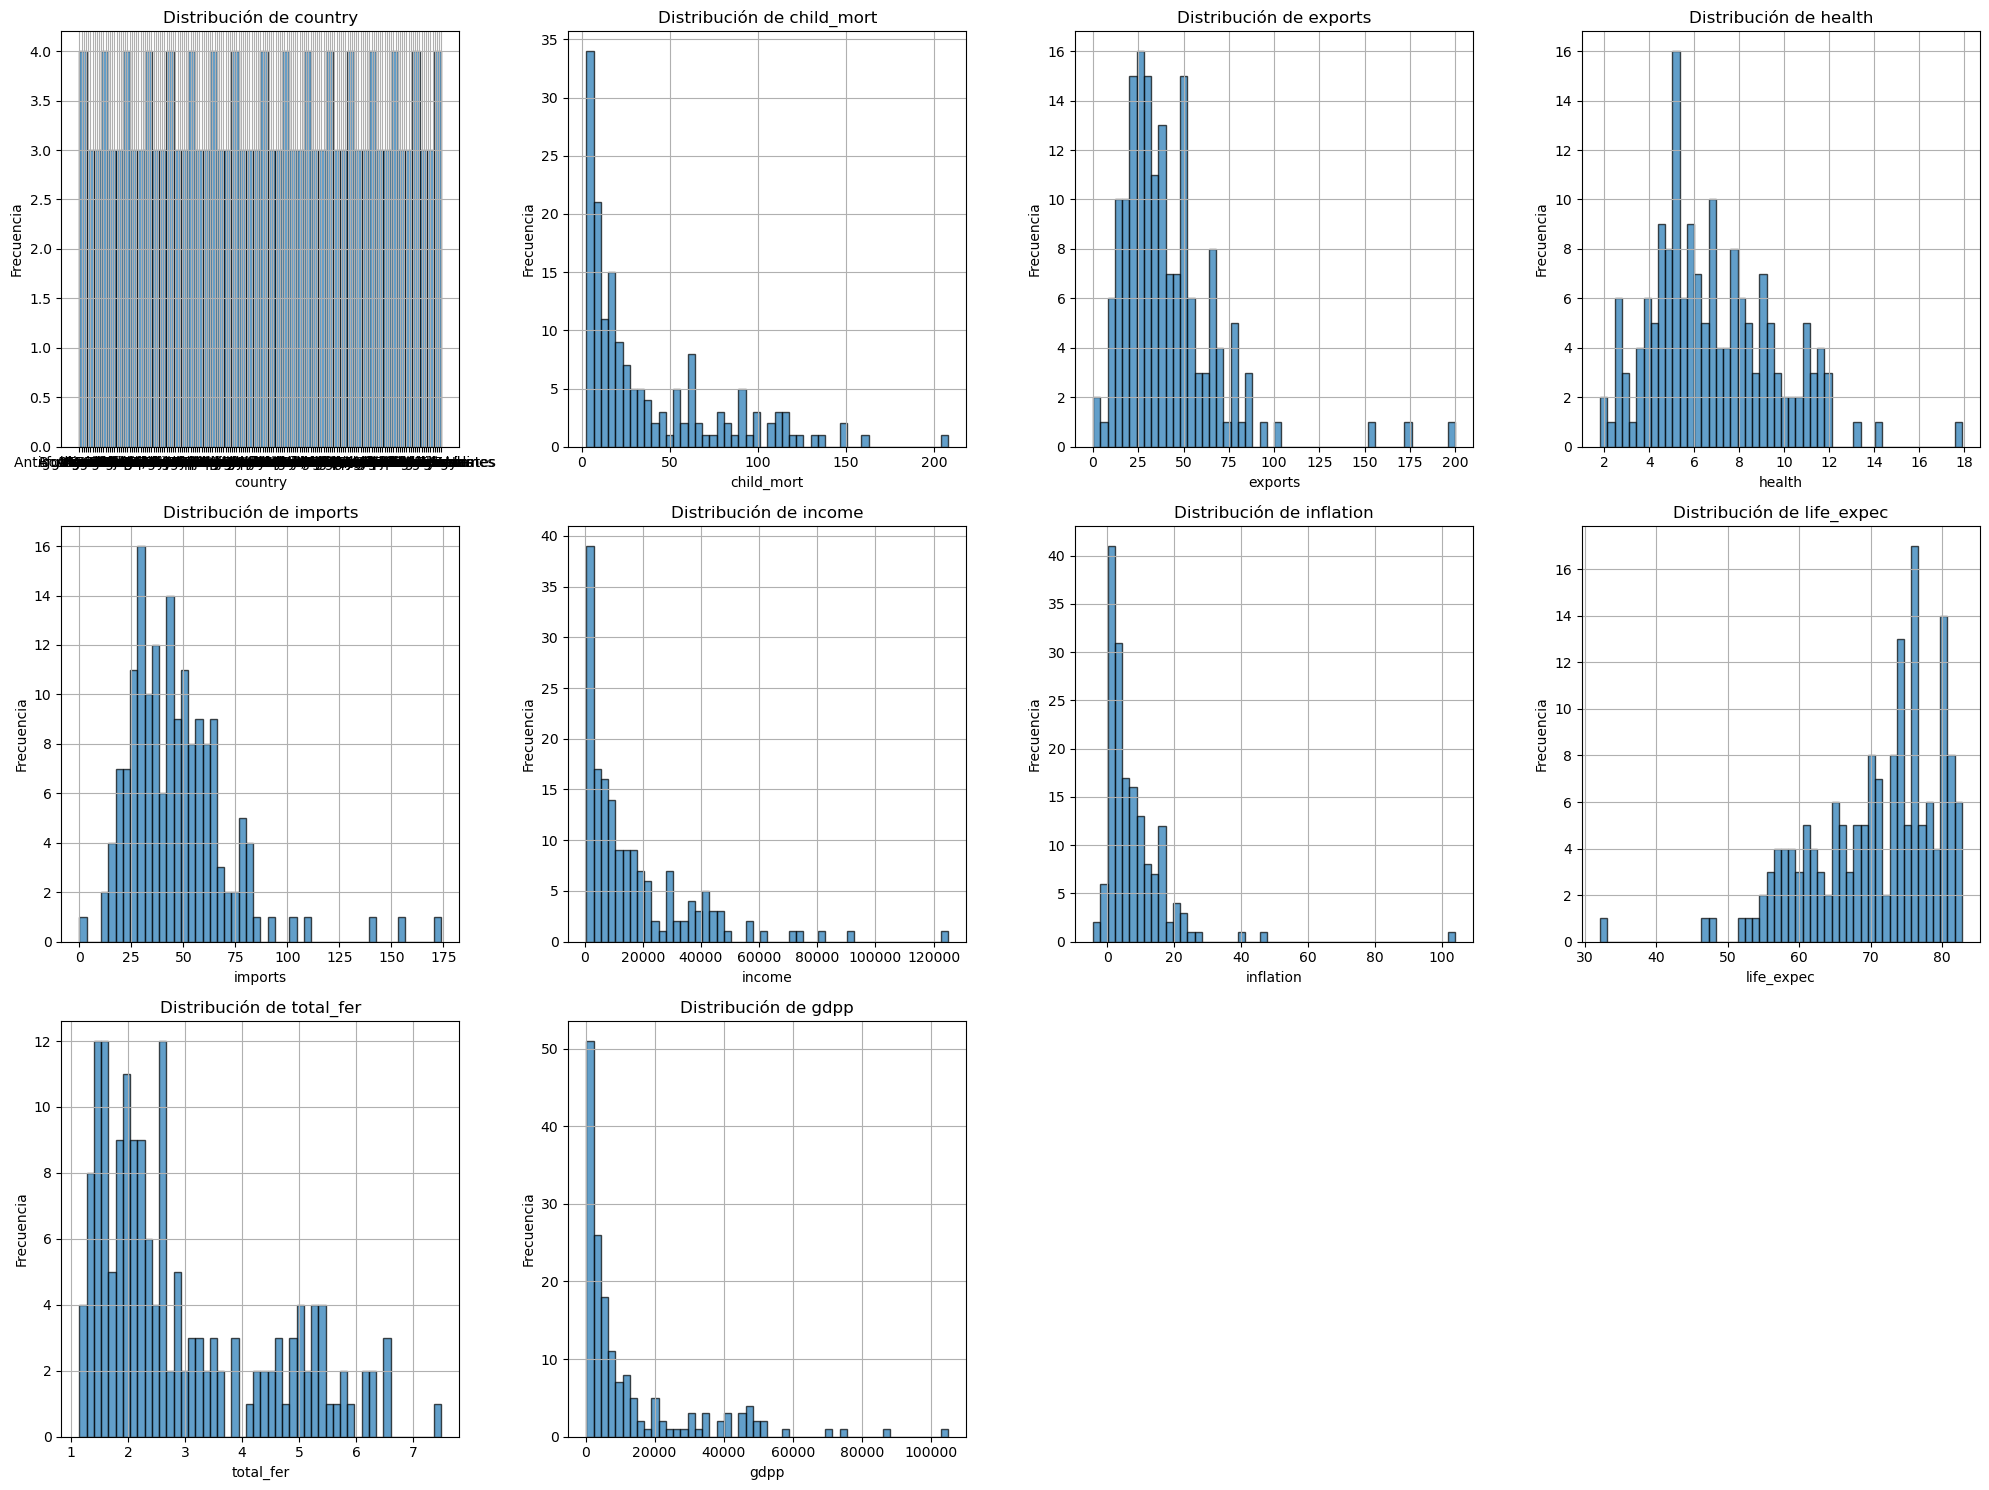

In [4]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = data.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(data[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


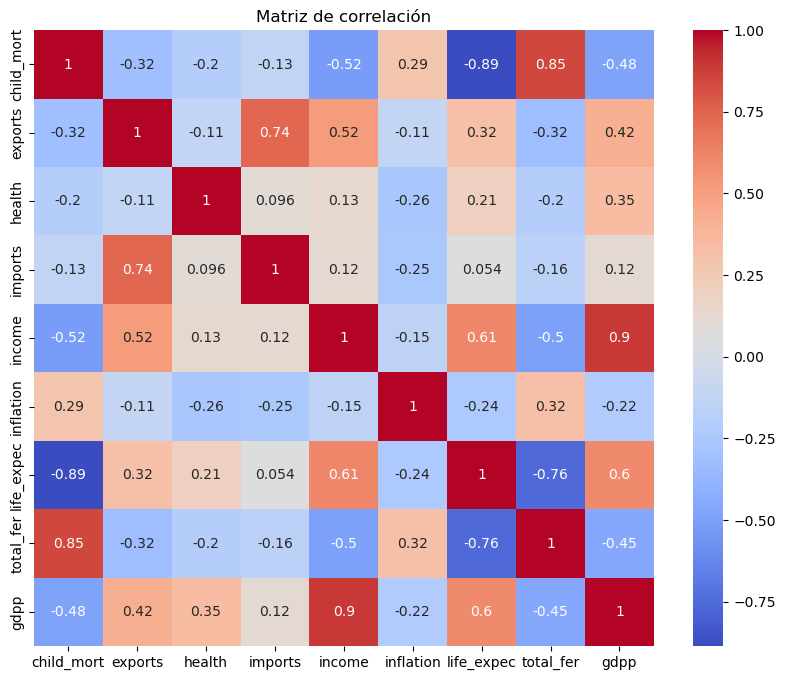

In [7]:
import seaborn as sns

# correlación de Pearson
corr = data.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


## ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
* PCA transforma tus variables originales correlacionadas en un conjunto de variables nuevas, llamadas componentes principales, que son independientes entre sí y retienen la mayor parte de la información (varianza) del conjunto de datos.
* ✅ Reducir la dimensionalidad
* ✅ Visualizar datos complejos (por ejemplo en 2D o 3D)
* ✅ Eliminar redundancias entre variables correlacionadas
* ✅ Preparar datos para clustering (ayuda a reducir el “ruido” y a estabilizar los algoritmos)



In [8]:
from sklearn.preprocessing import StandardScaler

# eliminar la columna 'country' antes
X = data.drop(columns=['country'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.decomposition import PCA

# elegimos 2 componentes para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


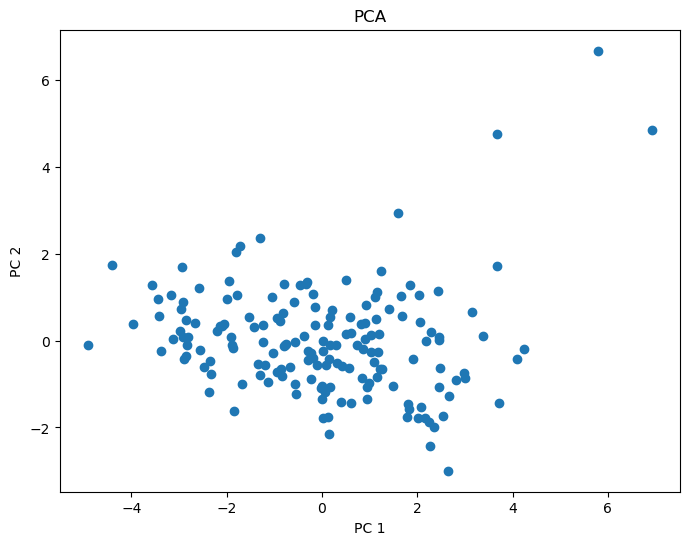

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA')
plt.show()


## K-MEANS 
* ✅ Es un algoritmo de clustering que agrupa los datos en K grupos o clusters
* ✅ Busca minimizar la distancia entre los puntos de cada grupo y el “centro” del grupo (centroide)
* Para elegir el k óptimo, primero se realiza el Método del Codo (Elbow Method)

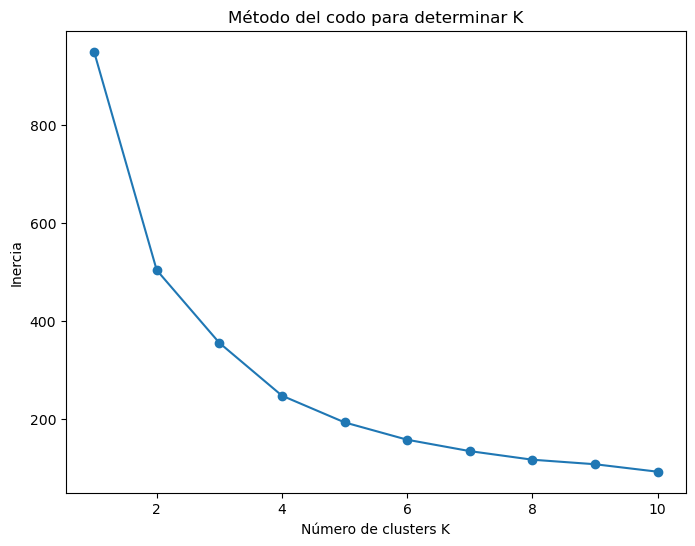

In [11]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Número de clusters K')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar K')
plt.show()

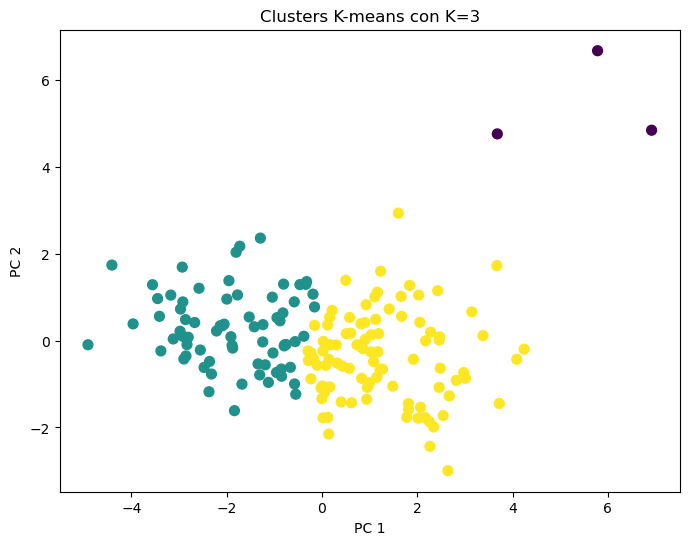

In [12]:
from sklearn.cluster import KMeans

# aquí puedes cambiarlo según el método del codo
k_optimo = 3   # por ejemplo, cámbialo a 4, 5, etc. manualmente

kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title(f'Clusters K-means con K={k_optimo}')
plt.show()

In [13]:
# agregarlo al DataFrame original
data['cluster_kmeans'] = clusters

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


## COEFICIENTE DE LA SILUETA
* Mide cuán bien separados están los clusters y qué tan cohesionados son internamente. Su valor está entre -1 y 1

* cercano a 1 → los puntos están bien agrupados

* cercano a 0 → los clusters se superponen

* negativo → mala asignación (los puntos estarían más cerca de otro cluster que del suyo)



In [14]:
from sklearn.metrics import silhouette_score

# clusters ya calculados
score = silhouette_score(X_pca, clusters)
print(f"Coeficiente de silueta para K={k_optimo}: {score:.3f}")

Coeficiente de silueta para K=3: 0.442


## CLÚSTER JERÁRQUICO
*  Agrupa los datos de forma jerárquica, creando un árbol de clusters (dendrograma). No requiere fijar K de antemano (aunque puedes cortar el árbol para decidir cuántos clusters al final)

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

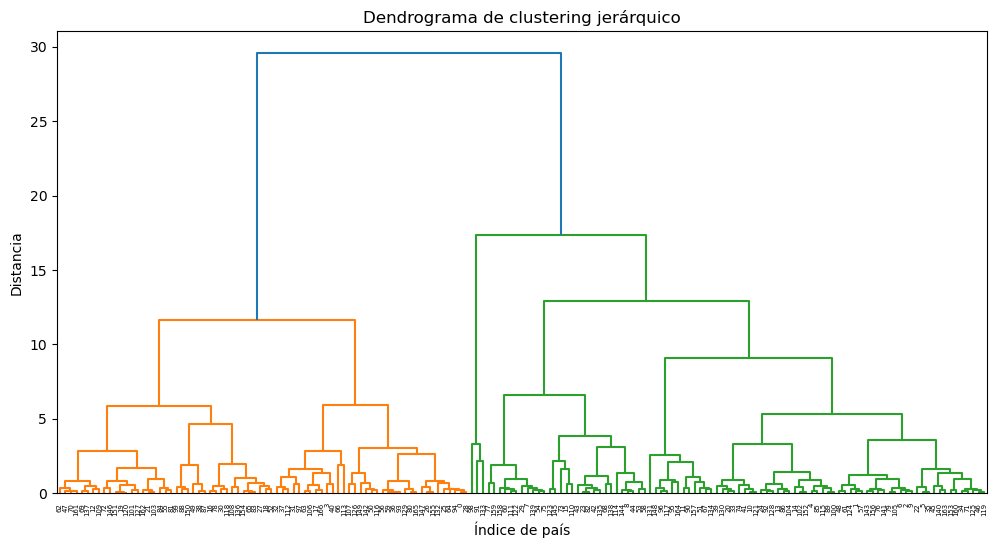

In [16]:
linked = linkage(X_pca, method='ward')  # ward minimiza la varianza intra-cluster

plt.figure(figsize=(12,6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrograma de clustering jerárquico')
plt.xlabel('Índice de país')
plt.ylabel('Distancia')
plt.show()


In [17]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X_pca)
data['cluster_jerarquico'] = clusters_hc # agregamos la columna cluster_jerarquico

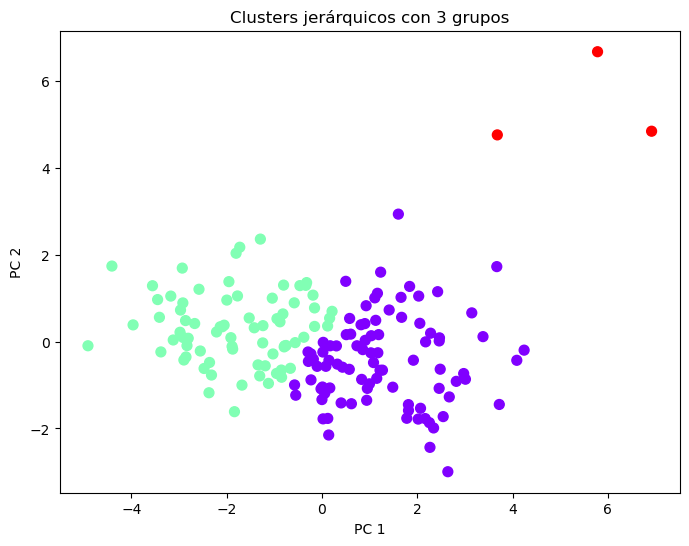

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hc, cmap='rainbow', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters jerárquicos con 3 grupos')
plt.show()


In [19]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_jerarquico
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0


In [20]:
from sklearn.metrics import silhouette_score

score_hc = silhouette_score(X_pca, clusters_hc)
print(f"Coeficiente de silueta para clustering jerárquico: {score_hc:.3f}")

Coeficiente de silueta para clustering jerárquico: 0.431


## DBSCAN
* DBSCAN significa Density-Based Spatial Clustering of Applications with Noise. Es un algoritmo basado en densidad, no requiere especificar el número de clusters de antemano. Puede detectar:
* clusters de forma arbitraria (no solo esferas como K-means)
* outliers (los marca como ruido)

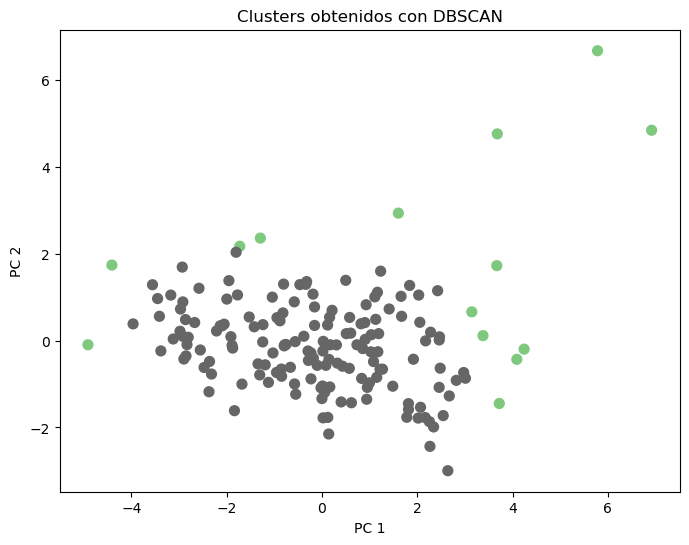

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_pca)

data['cluster_dbscan'] = clusters_dbscan

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_dbscan, cmap='Accent', s=50)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clusters obtenidos con DBSCAN')
plt.show()

In [22]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans,cluster_jerarquico,cluster_dbscan
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0
